In [148]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [149]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import mpl_toolkits.mplot3d.axes3d as p3

In [150]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [151]:
%matplotlib inline

# Data

In [152]:
velocity = 0.15

In [153]:
# Read data
motion = np.genfromtxt('../dataset3/motion_015.csv', delimiter=',', dtype=np.float64)
print("Motion data has a length of ", len(motion))

Motion data has a length of  17863


In [154]:
# Find idx of motion correspondant to 0.1
idx_motion_015 = []
for idx, row in enumerate(motion):
    if any(abs(item) == velocity for item in row[1:7]):
        idx_motion_015.append(idx)
        
motion_015 = motion[idx_motion_015]

In [155]:
motion_015.shape

(17863, 31)

## Visualizations

In [156]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    #print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
                    #ax.axvline(x=footstep_timestamp+0.2, color='b', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [157]:
def get_specific_cmd(dataset, fwd, side, rot):
    idxs = []
    for row_id, item in enumerate(motion_015):
        if np.isclose(item[1], fwd, 0.01) and np.isclose(item[2], side, 0.01) and np.isclose(item[6], rot, 0.01):
            idxs.append(row_id)
    
    return idxs

In [158]:
def get_swinging_motions(dataset, height=-0.1):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 9] < height)[0]
    fl_min_height = np.where(dataset[:, 12] < height)[0]
    rr_min_height = np.where(dataset[:, 15] < height)[0]
    rl_min_height = np.where(dataset[:, 18] < height)[0]
            
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_015

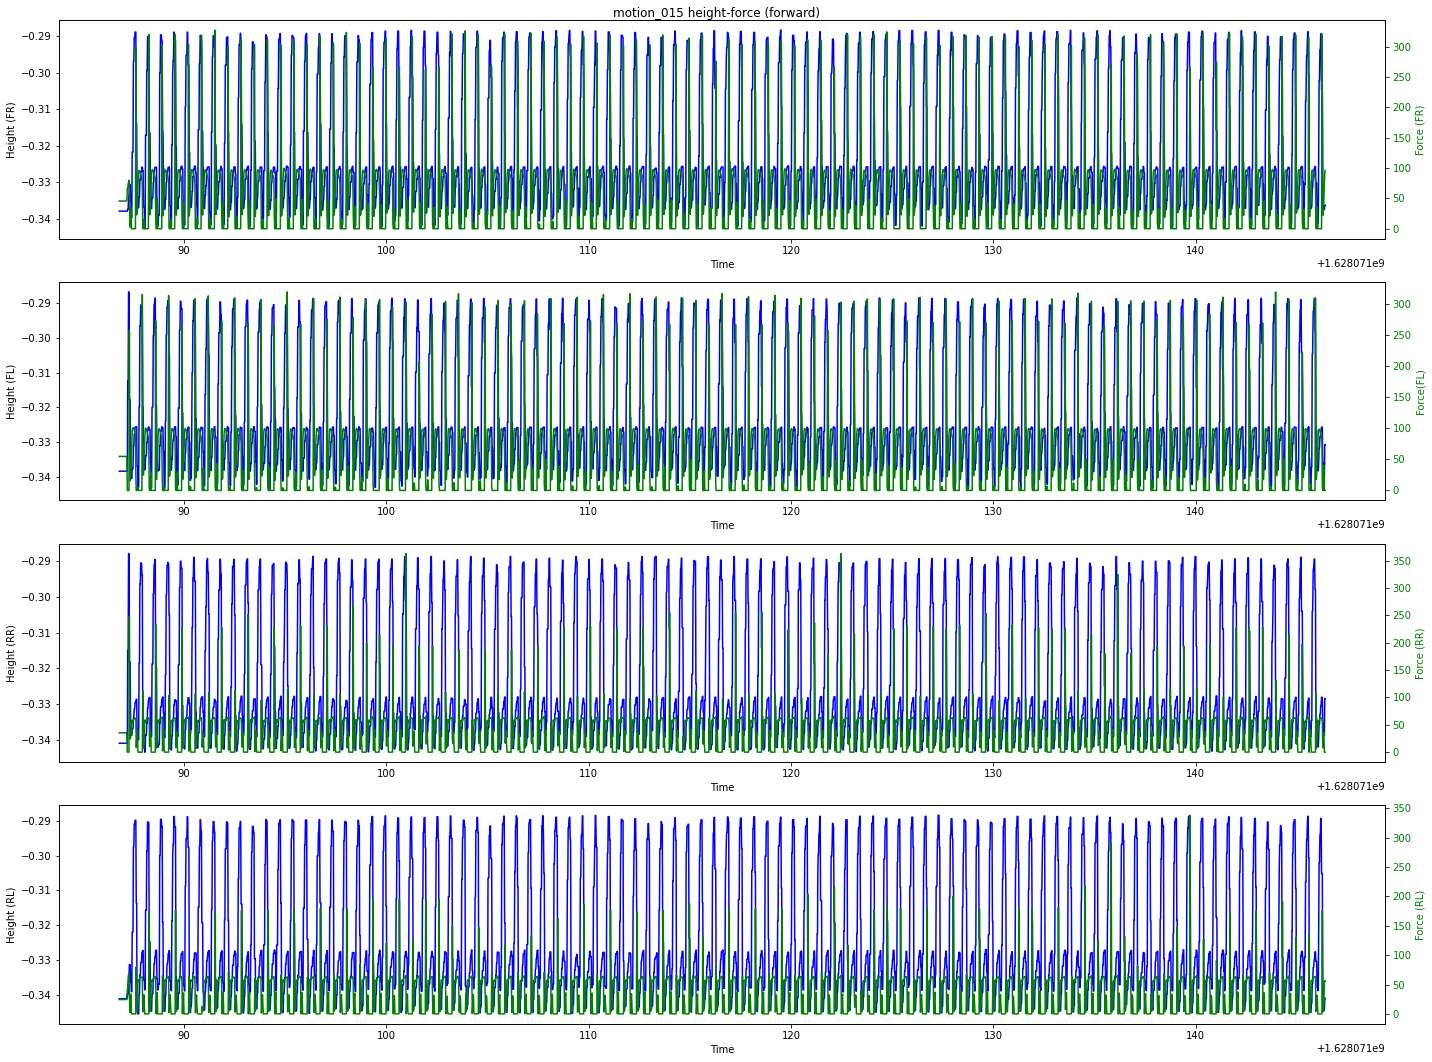

In [159]:
# Forward
fwd_cmds = get_specific_cmd(motion_015, velocity, 0, 0)
motion_015_fwd = motion_015[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_015_fwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_015 height-force (forward)",
                      motion_015,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [9, 21, 12, 24, 15, 27, 18, 30])

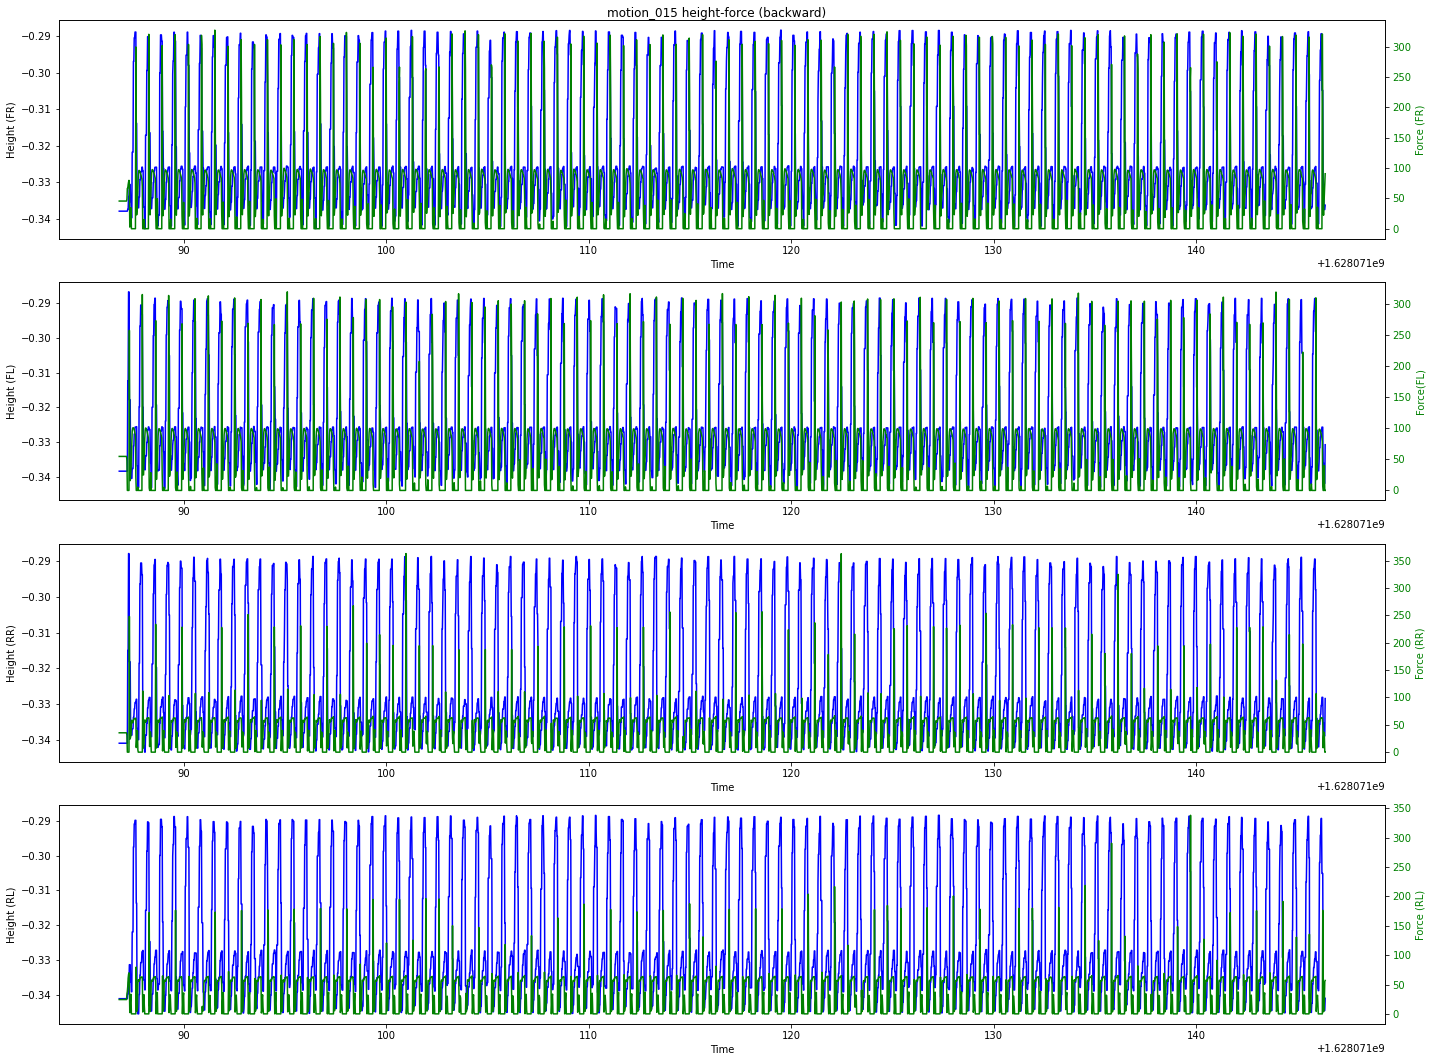

In [160]:
# Backwards
bwd_cmds = get_specific_cmd(motion_015, -velocity, 0, 0)
motion_015_bwd = motion_015[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_015_bwd)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_015 height-force (backward)",
                      motion_015,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [9, 21, 12, 24, 15, 27, 18, 30])

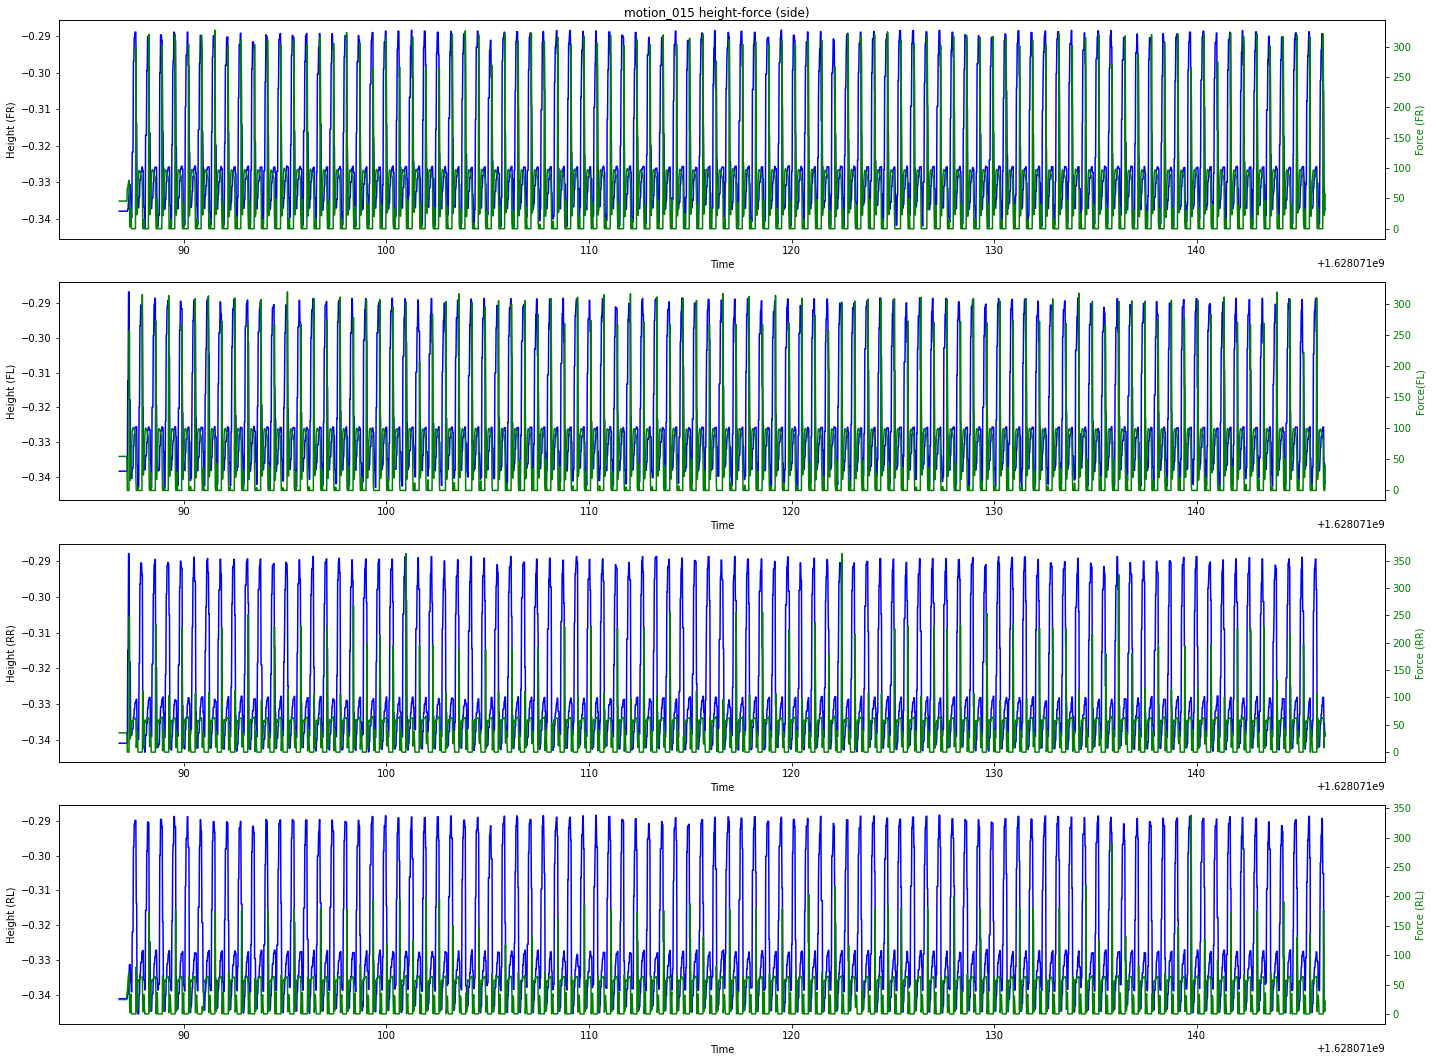

In [161]:
# Side (right)
side_cmds = get_specific_cmd(motion_015, 0, velocity, 0)
motion_015_side = motion_015[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_015_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_015 height-force (side)",
                      motion_015,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [9, 21, 12, 24, 15, 27, 18, 30])

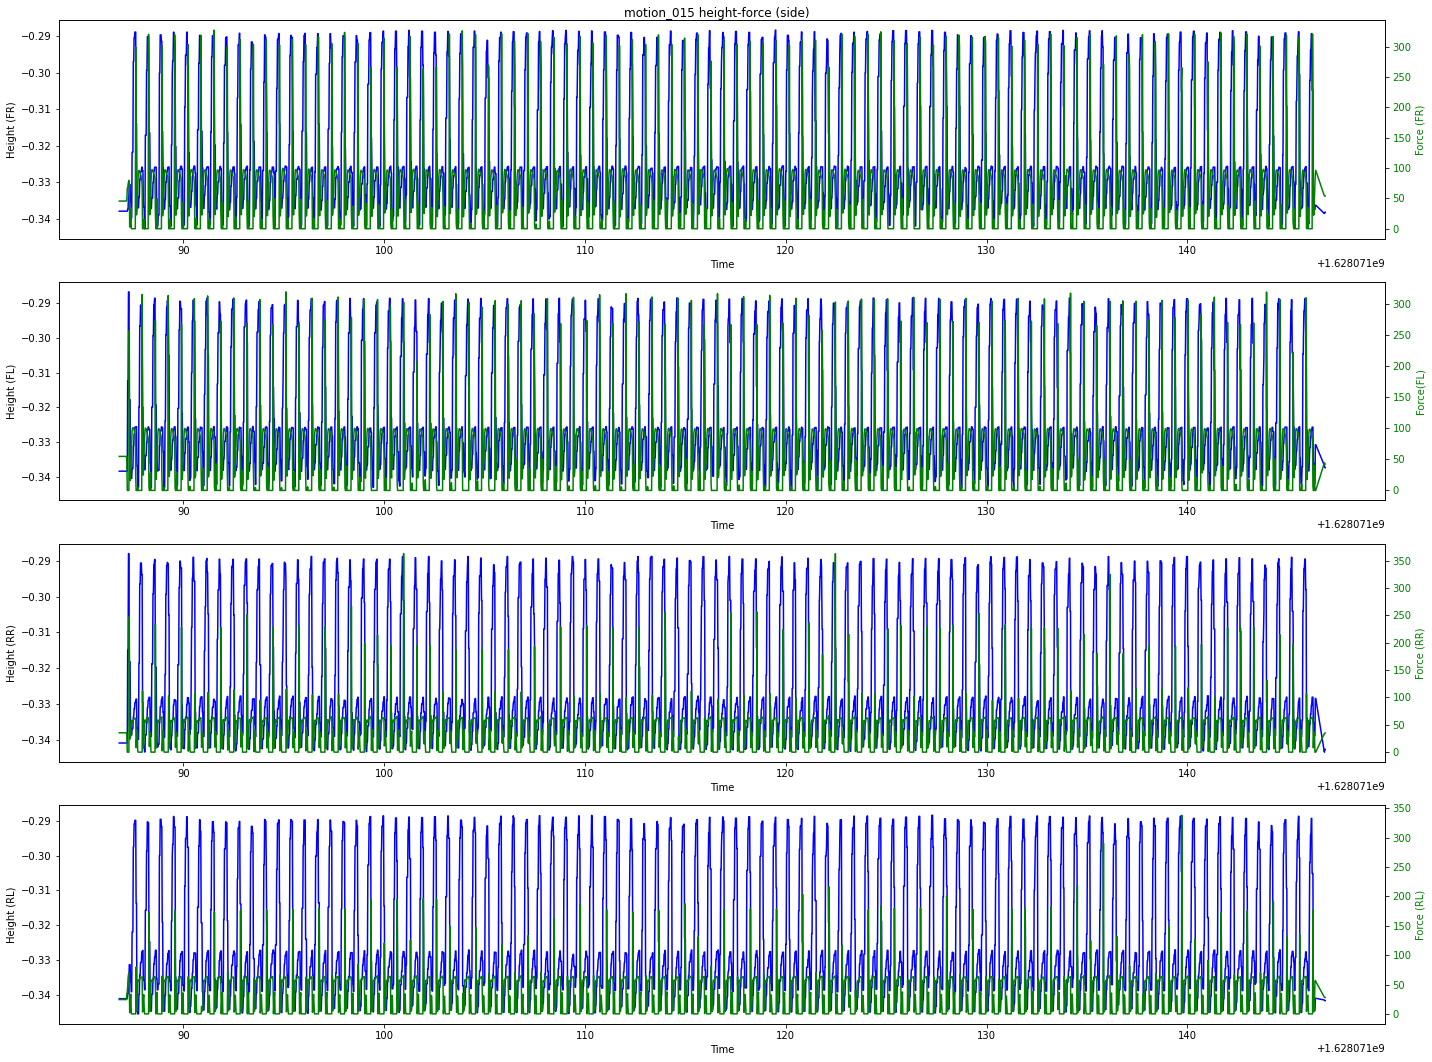

In [162]:
# Side (left)
side_cmds = get_specific_cmd(motion_015, 0, -velocity, 0)
motion_015_side = motion_015[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_015_side)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_015 height-force (side)",
                      motion_015,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [9, 21, 12, 24, 15, 27, 18, 30])

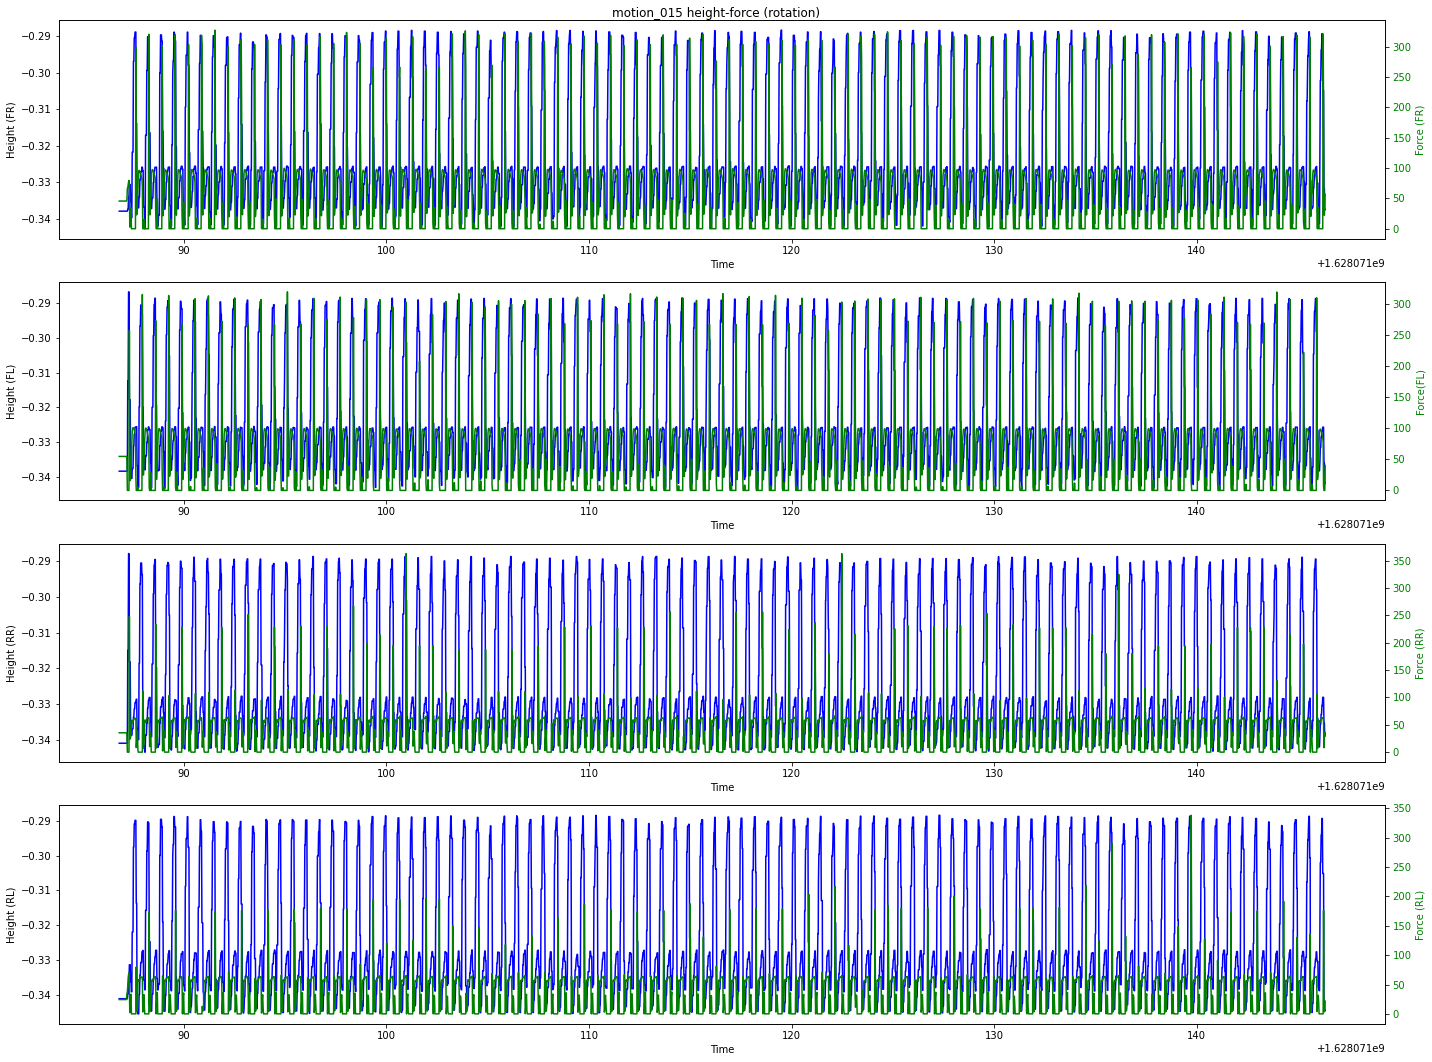

In [163]:
# Rotation (clockwise)
rot_cmds = get_specific_cmd(motion_015, 0, 0, velocity)
motion_015_rot = motion_015[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_015_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_015 height-force (rotation)",
                      motion_015,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [9, 21, 12, 24, 15, 27, 18, 30])

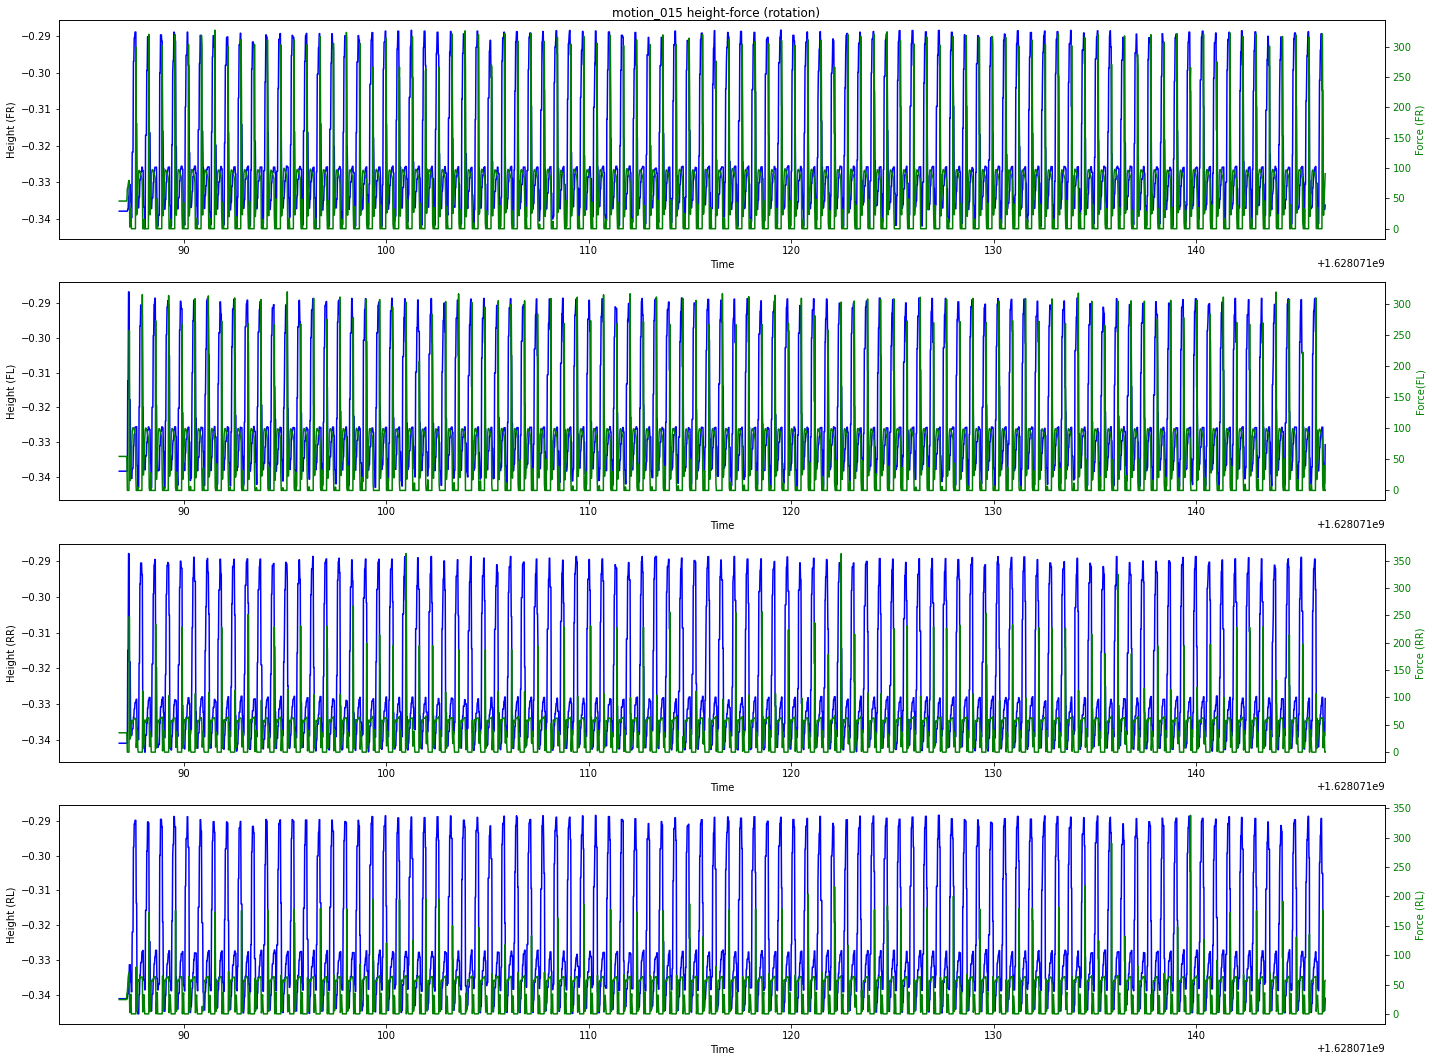

In [164]:
# Rotation (counter clockwise)
rot_cmds = get_specific_cmd(motion_015, 0, 0, -velocity)
motion_015_rot = motion_015[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_015_rot)

sample_walking_fr_height = fr_min_height
sample_walking_fl_height = fl_min_height
sample_walking_rr_height = rr_min_height
sample_walking_rl_height = rl_min_height

plot_overlapping_data("motion_015 height-force (rotation)",
                      motion_015,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [9, 21, 12, 24, 15, 27, 18, 30])

## Footsteps Extraction (Height + Force)

In [165]:
def extract_footsteps(dataset, height_threshold=0.1, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 9] - dataset[:, 12]), 9)
    print("Max diff between fr and fl: ", max(fr_fl_diff))

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 15] - dataset[:, 18]), 9)
    print("Max diff between rr and rl: ", max(rr_rl_diff))

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between front and rear feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Find footsteps based on force perceived
    rear_force_footsteps = np.where(np.logical_or(dataset[:, 21] <= force_thresholds[0], dataset[:, 24] <= force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_or(dataset[:, 27] <= force_thresholds[2], dataset[:, 30] <= force_thresholds[3]))[0]
    
     # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    return force_height_footsteps

"""
def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, dataset[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(dataset[footstep_sort, 0] - dataset[footsteps_sort[idx-1], 0]) < 0.15:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)
"""

def footsteps_nms(dataset, footsteps):
    footsteps_nms = []

    prev_similar = False
    footstep_to_add = footsteps[0]
    
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            if abs(dataset[footstep, 0] - dataset[footsteps[idx+1], 0]) < 0.15:
                footstep_to_add = footstep if dataset[footstep, 9] < dataset[footsteps[idx+1], 9] else footsteps[idx+1]
            else:
                footsteps_nms.append(footstep_to_add)
                
                # Account for next entry
                footstep_to_add = footsteps[idx+1]

    return np.asarray(footsteps_nms)

## Footsteps

In [166]:
def footstep_extraction_and_plotting(dataset, velocities, height_threshold, force_thresholds, indexes):
    # Extract backward motion entries
    cmds = get_specific_cmd(dataset, velocities[0], velocities[1], velocities[2])
    motion_015_cmds = motion_015[cmds]
    fr_min_height, fl_min_height, rr_min_height, rl_min_height = get_swinging_motions(motion_015_cmds)
    print("Foot swinging motions lenghts: ", len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    # Extract footsteps
    footsteps = extract_footsteps(motion_015_cmds, height_threshold, force_thresholds)
    print("Footsteps extracted: ", len(footsteps))
    
    # Footsteps NMS
    footsteps_after_nms = footsteps_nms(motion_015_cmds, footsteps)
    print("Footsteps after non-maximum-suppression: ", len(footsteps_after_nms))
    
    # Plot footsteps
    sample_walking_fr_height = fr_min_height[indexes]
    sample_walking_fl_height = fl_min_height[indexes]
    sample_walking_rr_height = rr_min_height[indexes]
    sample_walking_rl_height = rl_min_height[indexes]

    plot_overlapping_data("Footsteps",
                          motion_015_cmds,
                          [sample_walking_fr_height, 
                           sample_walking_fl_height, 
                           sample_walking_rr_height,
                           sample_walking_rl_height],
                           [9, 21, 12, 24, 15, 27, 18, 30],
                           True,
                           motion_015_cmds[footsteps_nms(motion_015_cmds, footsteps), 0])
    
    return motion_015_cmds, footsteps_after_nms

### Forward motion

Foot swinging motions lenghts:  2978 2978 2978 2978
Max diff between fr and fl:  0.047108471
Max diff between rr and rl:  0.048291504
Min and max diff between front and rear feet 0.000785887 0.095399975 

Amount of footsteps found with height criteria:  1234 

Number of force footsteps:  2601 

Number of height-force footsteps:  1014 

Footsteps extracted:  1014
Footsteps after non-maximum-suppression:  182


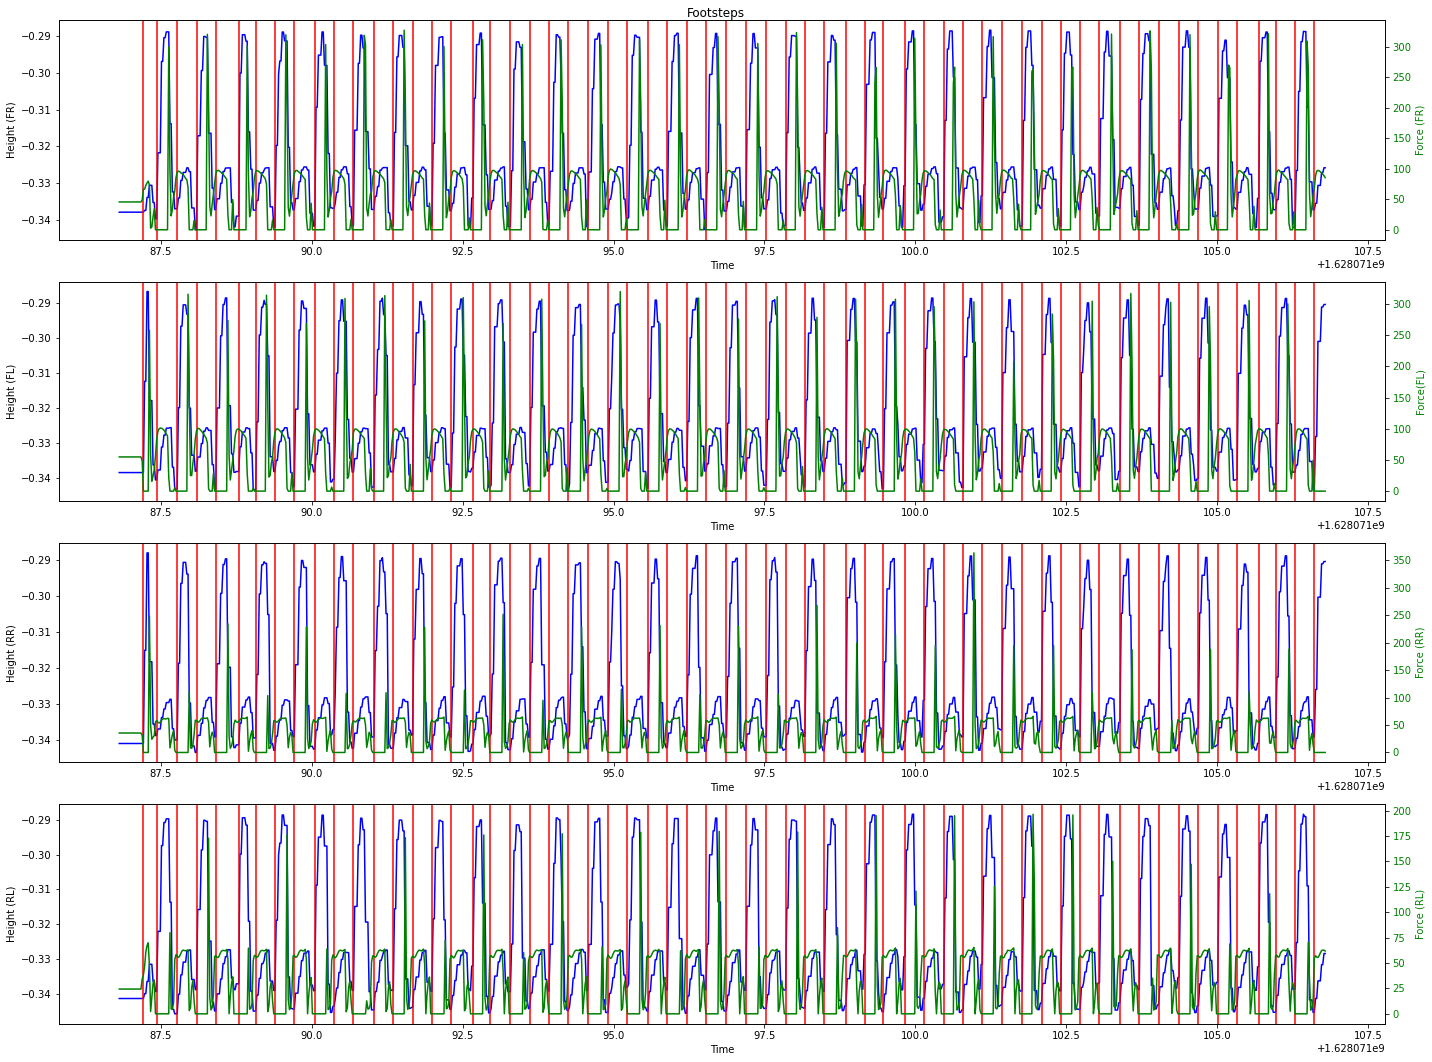

In [167]:
motion_015_fwd, footsteps_015_fwd = footstep_extraction_and_plotting(dataset=motion_015, velocities=[velocity, 0, 0], height_threshold=0.02, force_thresholds=[20,20,20,20], indexes=range(0, 1000))

### Backward motion

Foot swinging motions lenghts:  2977 2977 2977 2977
Max diff between fr and fl:  0.047880054
Max diff between rr and rl:  0.046729475
Min and max diff between front and rear feet 1.353e-05 0.094609529 

Amount of footsteps found with height criteria:  1237 

Number of force footsteps:  2448 

Number of height-force footsteps:  858 

Footsteps extracted:  858
Footsteps after non-maximum-suppression:  181


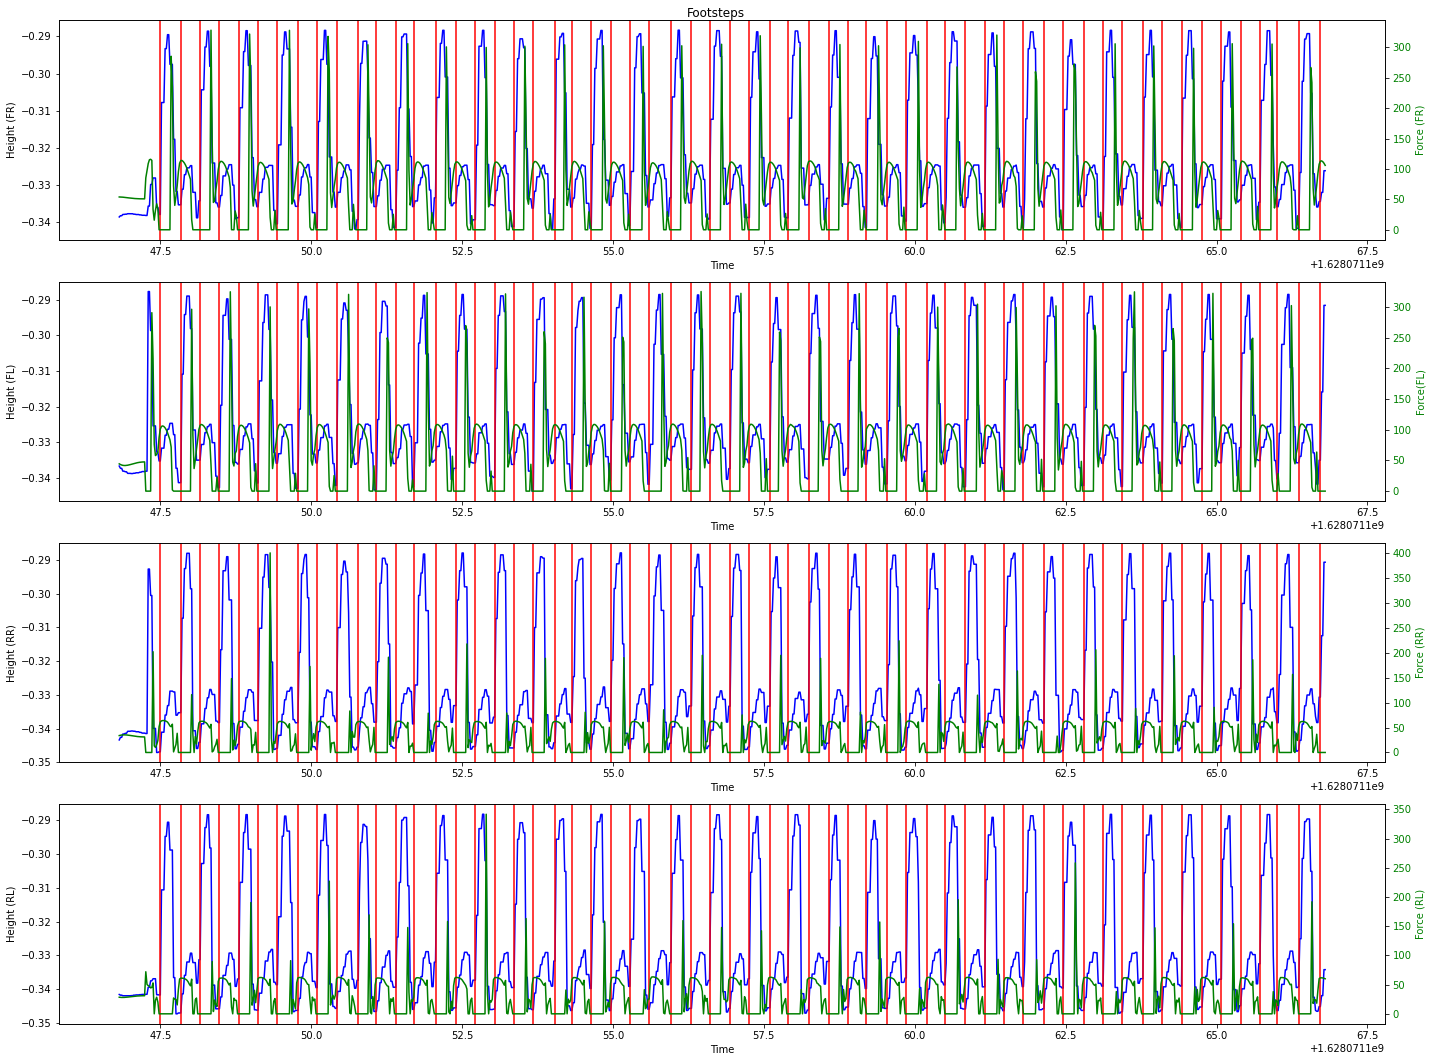

In [168]:
motion_015_bwd, footsteps_015_bwd = footstep_extraction_and_plotting(dataset=motion_015, velocities=[-velocity, 0, 0], height_threshold=0.02, force_thresholds=[20,20,20,20], indexes=range(0, 1000))

### Side motion (right)

Foot swinging motions lenghts:  2975 2975 2975 2975
Max diff between fr and fl:  0.044495493
Max diff between rr and rl:  0.045387775
Min and max diff between front and rear feet 0.000550807 0.089883268 

Amount of footsteps found with height criteria:  1238 

Number of force footsteps:  2444 

Number of height-force footsteps:  865 

Footsteps extracted:  865
Footsteps after non-maximum-suppression:  181


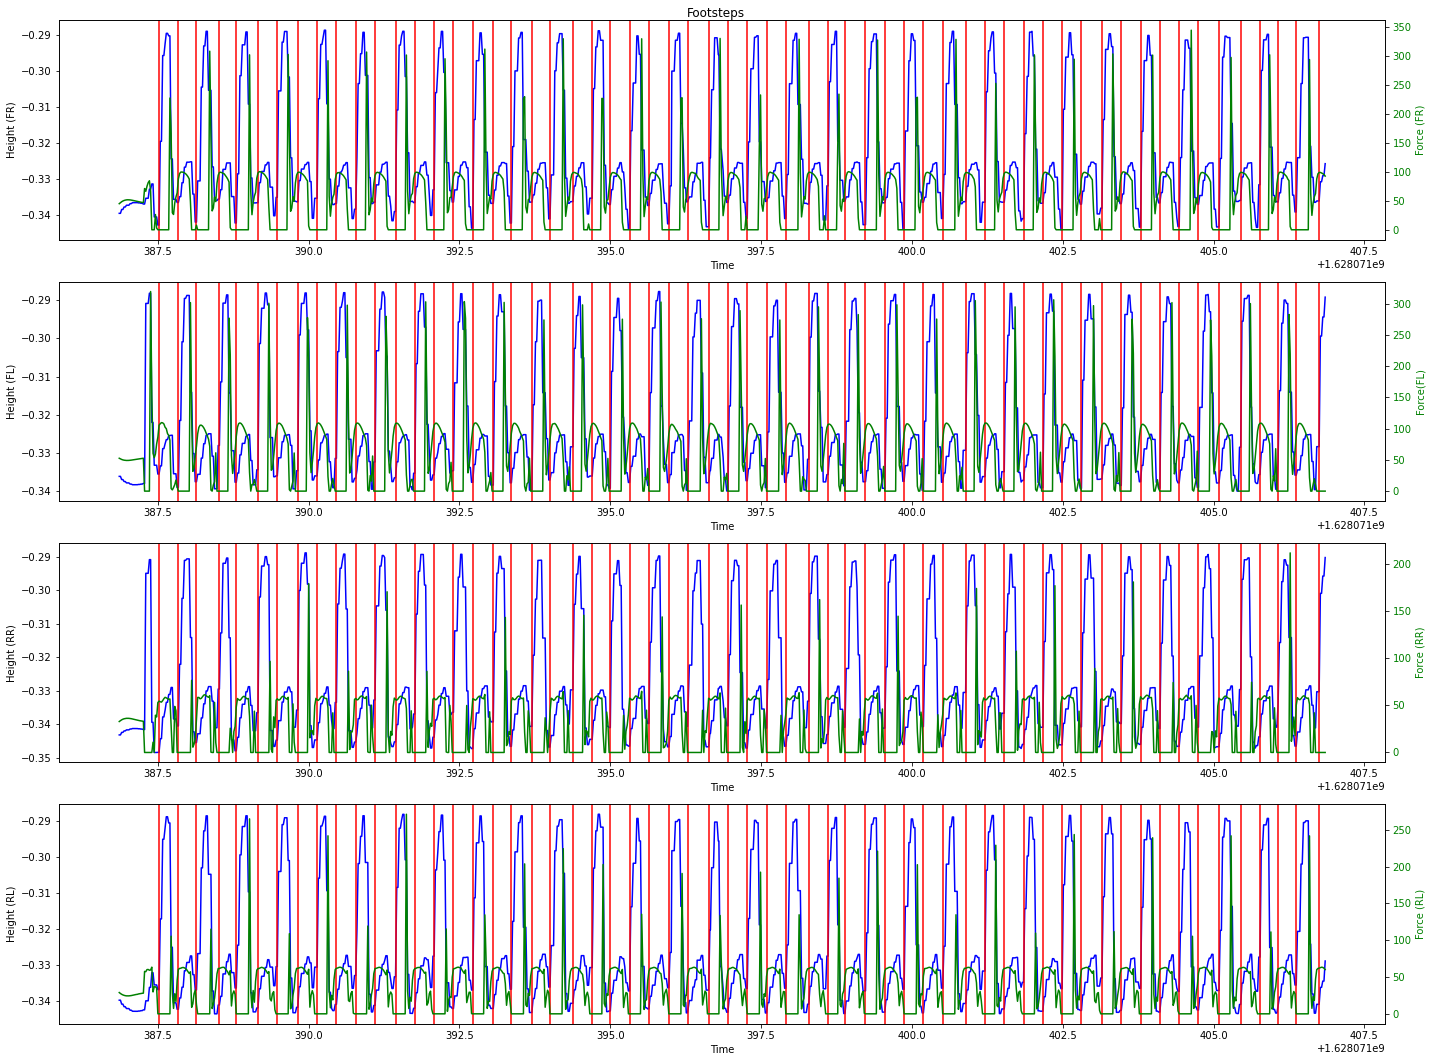

In [169]:
motion_015_side_right, footsteps_015_side_right = footstep_extraction_and_plotting(dataset=motion_015, velocities=[0, velocity, 0],  height_threshold=0.02, force_thresholds=[20,20,20,20], indexes=range(0, 1000))

### Side (left)

Foot swinging motions lenghts:  2981 2981 2981 2981
Max diff between fr and fl:  0.045054674
Max diff between rr and rl:  0.048157275
Min and max diff between front and rear feet 6.2705e-05 0.093211949 

Amount of footsteps found with height criteria:  1224 

Number of force footsteps:  2556 

Number of height-force footsteps:  948 

Footsteps extracted:  948
Footsteps after non-maximum-suppression:  181


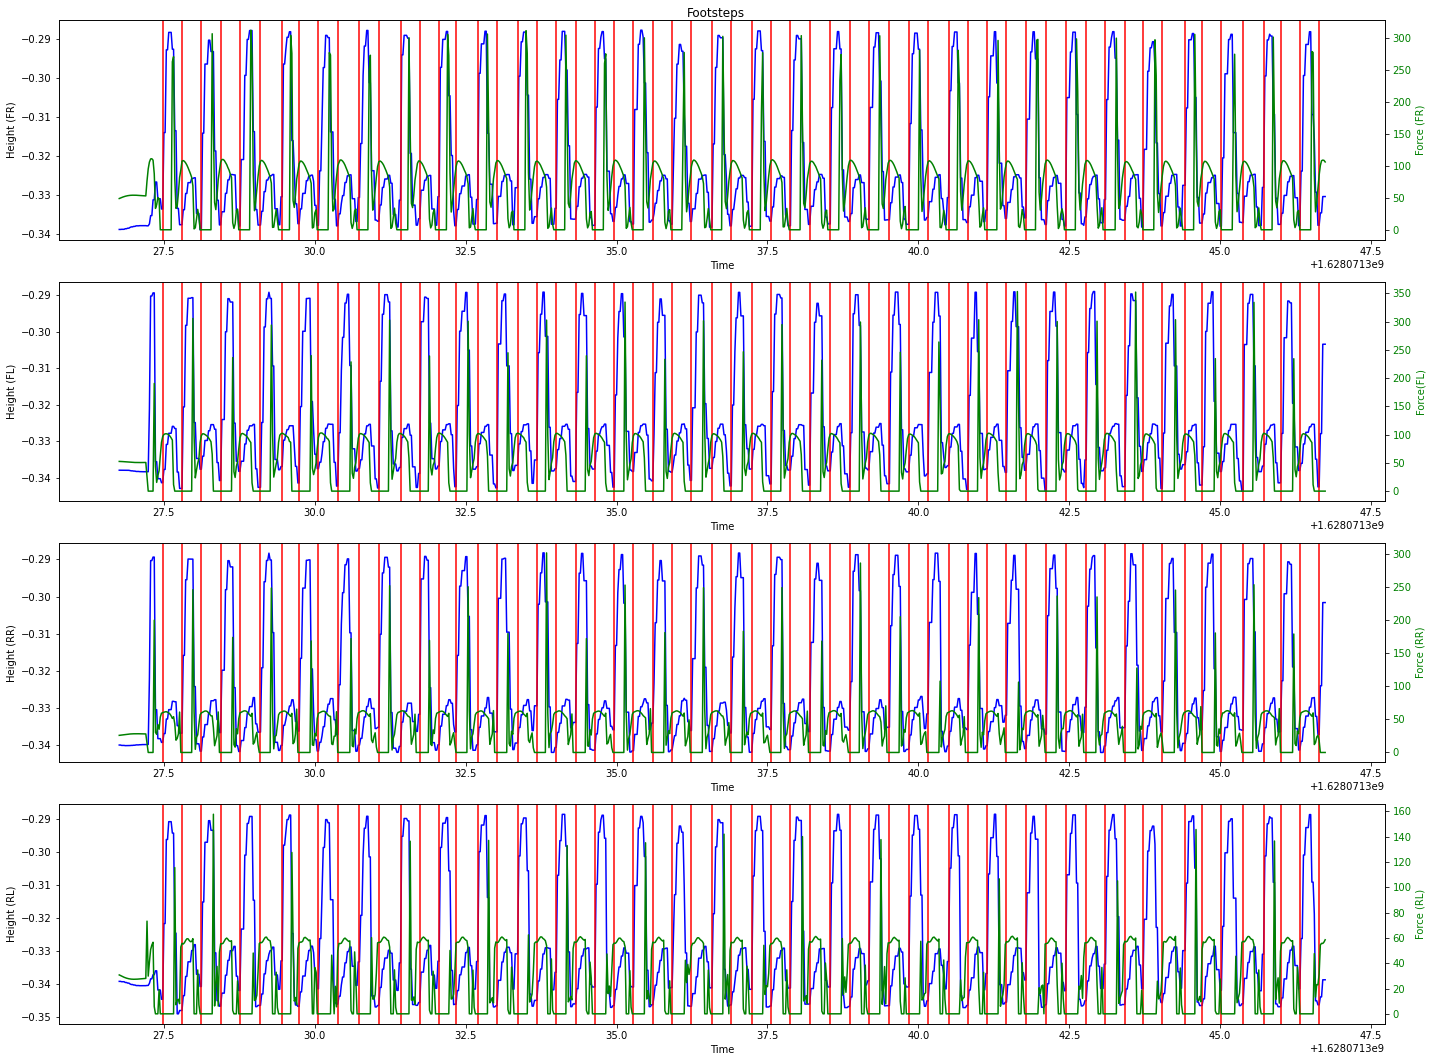

In [170]:
motion_015_side_left, footsteps_015_side_left = footstep_extraction_and_plotting(dataset=motion_015, velocities=[0, -velocity, 0],  height_threshold=0.02, force_thresholds=[20,20,20,20], indexes=range(0, 1000))

### Rotation (clockwise)

Foot swinging motions lenghts:  2975 2975 2975 2975
Max diff between fr and fl:  0.047011554
Max diff between rr and rl:  0.050129861
Min and max diff between front and rear feet 0.000175953 0.097141415 

Amount of footsteps found with height criteria:  1249 

Number of force footsteps:  2572 

Number of height-force footsteps:  994 

Footsteps extracted:  994
Footsteps after non-maximum-suppression:  181


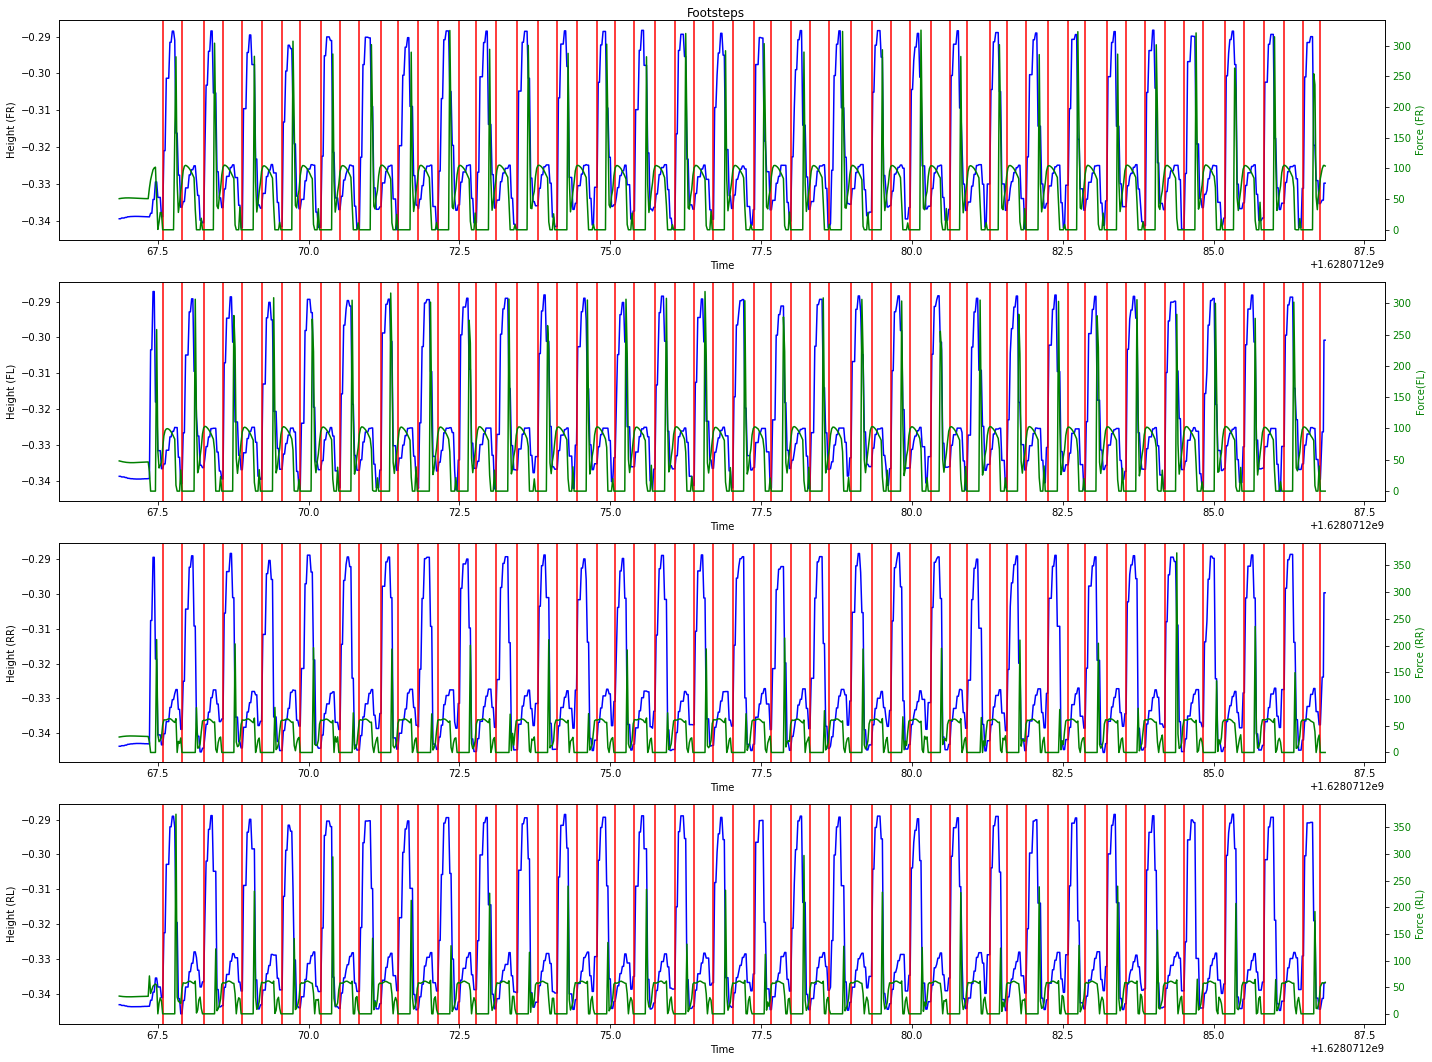

In [171]:
motion_015_clock, footsteps_015_clock = footstep_extraction_and_plotting(dataset=motion_015, velocities=[0, 0, velocity],  height_threshold=0.02, force_thresholds=[20,20,20,20], indexes=range(0, 1000))

### Rotation (counter clockwise)

Foot swinging motions lenghts:  2977 2977 2977 2977
Max diff between fr and fl:  0.044979274
Max diff between rr and rl:  0.044211477
Min and max diff between front and rear feet 0.000353157 0.088834494 

Amount of footsteps found with height criteria:  1262 

Number of force footsteps:  2548 

Number of height-force footsteps:  987 

Footsteps extracted:  987
Footsteps after non-maximum-suppression:  182


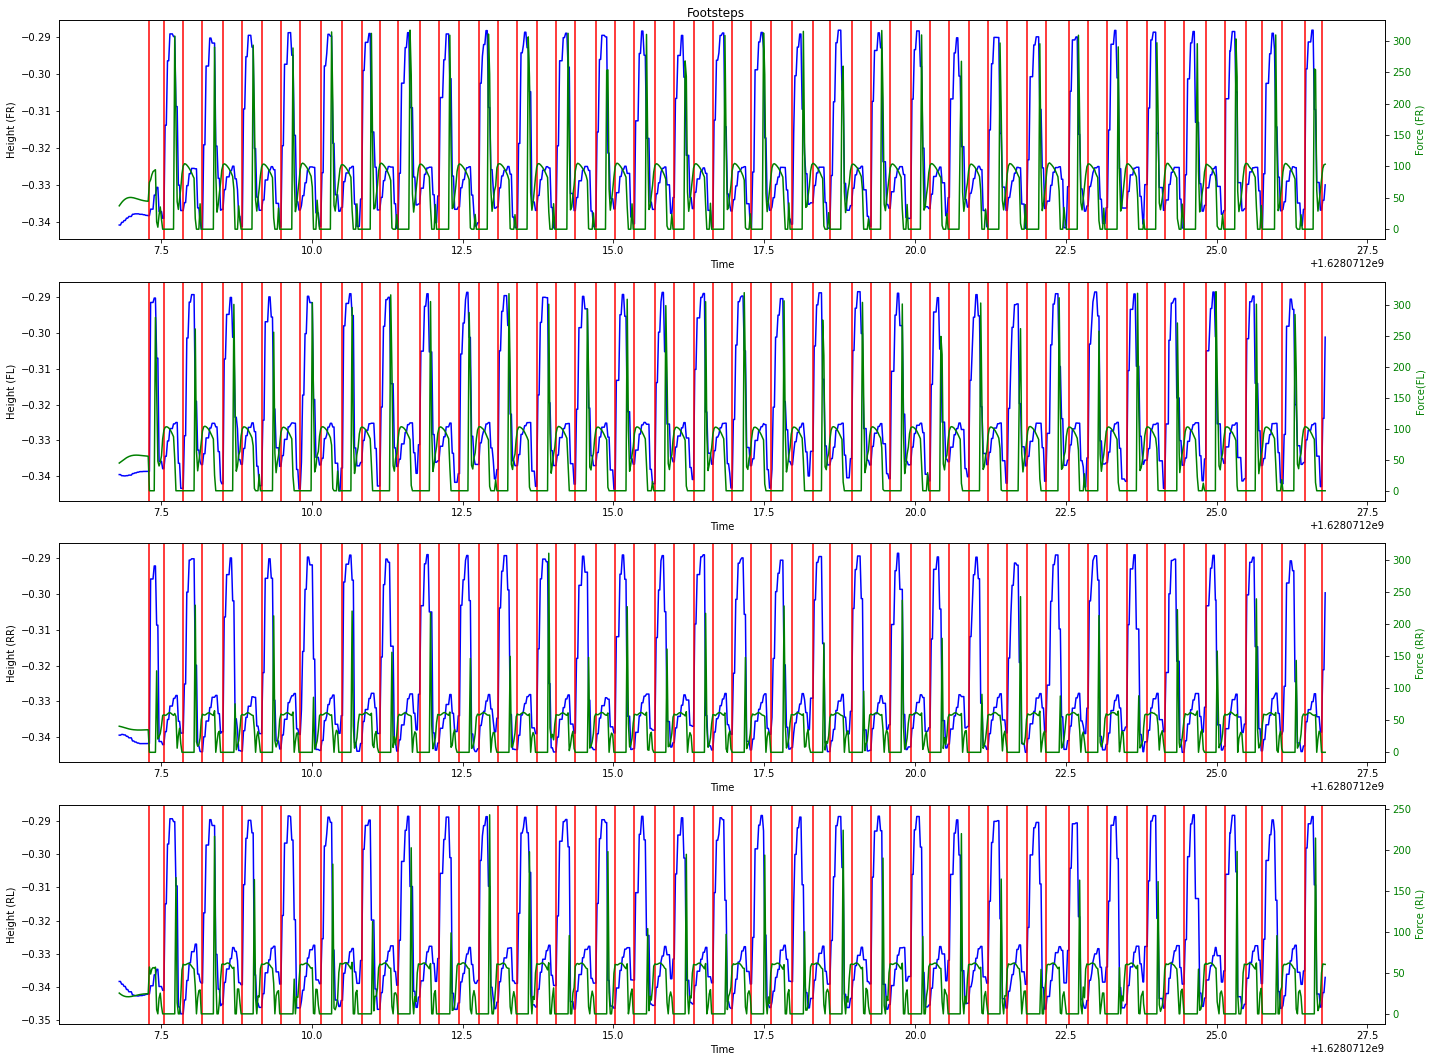

In [172]:
motion_015_count, footsteps_015_count = footstep_extraction_and_plotting(dataset=motion_015, velocities=[0, 0, -velocity],  height_threshold=0.02, force_thresholds=[20,20,20,20], indexes=range(0, 1000))

### Step size

In [173]:
def get_step_size(dataset, footsteps, idx_coord=[7,10,13,16]):
    # Footsteps sizes
    step_size_fr = []
    step_size_fl = []
    step_size_rr = []
    step_size_rl = []
    footstep_period = []
    
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]

            if time_diff < 1.5:
                footstep_period.append(time_diff)
                step_size_fl.append(dataset[footsteps[idx], idx_coord[0]] - dataset[footsteps[idx-1], idx_coord[0]])
                step_size_fr.append(dataset[footsteps[idx], idx_coord[1]] - dataset[footsteps[idx-1], idx_coord[1]])
                step_size_rl.append(dataset[footsteps[idx], idx_coord[2]] - dataset[footsteps[idx-1], idx_coord[2]])
                step_size_rr.append(dataset[footsteps[idx], idx_coord[3]] - dataset[footsteps[idx-1], idx_coord[3]])
    
    # Convert to numpy array
    step_size_fl_numpy = np.array(step_size_fl)
    step_size_fr_numpy = np.array(step_size_fr)
    step_size_rl_numpy = np.array(step_size_rl)
    step_size_rr_numpy = np.array(step_size_rr)
    footstep_period_numpy = np.array(footstep_period)
    
    # Only keep positive footsteps
    step_size_fl_numpy = step_size_fl_numpy[np.where(step_size_fl_numpy > 0)[0]]
    step_size_fr_numpy = step_size_fr_numpy[np.where(step_size_fr_numpy > 0)[0]]
    step_size_rl_numpy = step_size_rl_numpy[np.where(step_size_rl_numpy > 0)[0]]
    step_size_rr_numpy = step_size_rr_numpy[np.where(step_size_rr_numpy > 0)[0]]
        
    # Print average step-size
    print("Avg. step size time: ", np.mean(footstep_period_numpy))
    print("Avg. step size for FL foot: ", np.mean(step_size_fl_numpy))
    print("Avg. step size for FR foot: ", np.mean(step_size_fr_numpy))
    print("Avg. step size for RL foot: ", np.mean(step_size_rl_numpy))
    print("Avg. step size for RR foot: ", np.mean(step_size_rr_numpy), '\n')

    # Print std. dev. step-size
    print("Std. dev. step size for FL foot: ", np.std(step_size_fl_numpy))
    print("Std. dev. step size for FR foot: ", np.std(step_size_fr_numpy))
    print("Std. dev. step size for RL foot: ", np.std(step_size_rl_numpy))
    print("Std. dev. step size for RR foot: ", np.std(step_size_rr_numpy), '\n')
    
    return step_size_fr_numpy, step_size_fl_numpy, step_size_rr_numpy, step_size_rl_numpy

#### Forward motion

In [174]:
# Step size and velocity along x axis 
step_size_fr_x_fwd,_,_,_ = get_step_size(motion_015_fwd, footsteps_015_fwd)

Avg. step size time:  0.3250828724539741
Avg. step size for FL foot:  0.047203581697388884
Avg. step size for FR foot:  0.04137163339087912
Avg. step size for RL foot:  0.04204267558159341
Avg. step size for RR foot:  0.0414350493087 

Std. dev. step size for FL foot:  0.004130996343049883
Std. dev. step size for FR foot:  0.006289533083678025
Std. dev. step size for RL foot:  0.006926505427103711
Std. dev. step size for RR foot:  0.005120596612301688 



In [175]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_015_fwd, footsteps_015_fwd, idx_coord=[8, 11, 14, 17])

Avg. step size time:  0.3250828724539741
Avg. step size for FL foot:  0.0055597465444615374
Avg. step size for FR foot:  0.0021323258786086928
Avg. step size for RL foot:  0.0012772556517362632
Avg. step size for RR foot:  0.0008549944537826089 

Std. dev. step size for FL foot:  0.0011991847445563088
Std. dev. step size for FR foot:  0.001132265308424352
Std. dev. step size for RL foot:  0.0007468137653882741
Std. dev. step size for RR foot:  0.000601884368690662 



### Backward motion

In [176]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_015_bwd, footsteps_015_bwd)

Avg. step size time:  0.3253333330154419
Avg. step size for FL foot:  0.05660721626545554
Avg. step size for FR foot:  0.05039140598642222
Avg. step size for RL foot:  0.05828501449698889
Avg. step size for RR foot:  0.05906806720624445 

Std. dev. step size for FL foot:  0.004796421353582081
Std. dev. step size for FR foot:  0.006372418517645563
Std. dev. step size for RL foot:  0.006139199477754687
Std. dev. step size for RR foot:  0.0039440331403258625 



In [177]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_015_bwd, footsteps_015_bwd, idx_coord=[8, 11, 14, 17])

Avg. step size time:  0.3253333330154419
Avg. step size for FL foot:  0.004405782620144445
Avg. step size for FR foot:  0.003958103557466666
Avg. step size for RL foot:  0.0018101378783846136
Avg. step size for RR foot:  0.0021566763195652173 

Std. dev. step size for FL foot:  0.0016466504544662072
Std. dev. step size for FR foot:  0.0010060314773864846
Std. dev. step size for RL foot:  0.0009864304941810977
Std. dev. step size for RR foot:  0.0010438152274509713 



### Side motion (right)

In [178]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_015_side_right, footsteps_015_side_right)

Avg. step size time:  0.32527777751286824
Avg. step size for FL foot:  0.003158947659822223
Avg. step size for FR foot:  0.007171036965288891
Avg. step size for RL foot:  0.006164641181666666
Avg. step size for RR foot:  0.008486363622844443 

Std. dev. step size for FL foot:  0.0005954855972961889
Std. dev. step size for FR foot:  0.0007286312022807638
Std. dev. step size for RL foot:  0.0014919095573855908
Std. dev. step size for RR foot:  0.0015000647804925096 



In [179]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_015_side_right, footsteps_015_side_right, idx_coord=[8, 11, 14, 17])

Avg. step size time:  0.32527777751286824
Avg. step size for FL foot:  0.0501317687332811
Avg. step size for FR foot:  0.05446397918795555
Avg. step size for RL foot:  0.04714292817635778
Avg. step size for RR foot:  0.048839176363466665 

Std. dev. step size for FL foot:  0.005929085929183346
Std. dev. step size for FR foot:  0.0057301986062100905
Std. dev. step size for RL foot:  0.008139244125429136
Std. dev. step size for RR foot:  0.004588721189117195 



### Side motions (left)

In [180]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_015_side_left, footsteps_015_side_left)

Avg. step size time:  0.3253333330154419
Avg. step size for FL foot:  0.010289144515944443
Avg. step size for FR foot:  0.0020263253638426963
Avg. step size for RL foot:  0.00587063199951111
Avg. step size for RR foot:  0.006431986557077776 

Std. dev. step size for FL foot:  0.0007259603088191854
Std. dev. step size for FR foot:  0.0005744520736128322
Std. dev. step size for RL foot:  0.0009972863994641584
Std. dev. step size for RR foot:  0.0013830082057177027 



In [181]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_015_side_left, footsteps_015_side_left, idx_coord=[8, 11, 14, 17])

Avg. step size time:  0.3253333330154419
Avg. step size for FL foot:  0.06110589082041112
Avg. step size for FR foot:  0.044052470227133336
Avg. step size for RL foot:  0.04585428395198888
Avg. step size for RR foot:  0.052541267126796666 

Std. dev. step size for FL foot:  0.00417654634375213
Std. dev. step size for FR foot:  0.006345091245681242
Std. dev. step size for RL foot:  0.0041589228483989845
Std. dev. step size for RR foot:  0.004682029840672983 



### Rotation (clockwise)

In [182]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_015_clock, footsteps_015_clock)

Avg. step size time:  0.32544444534513683
Avg. step size for FL foot:  0.01202147702368889
Avg. step size for FR foot:  0.0022873547342888868
Avg. step size for RL foot:  0.014592485957700001
Avg. step size for RR foot:  0.0017448330054891303 

Std. dev. step size for FL foot:  0.0008020325235196194
Std. dev. step size for FR foot:  0.0008064396180217753
Std. dev. step size for RL foot:  0.0014082243044767461
Std. dev. step size for RR foot:  0.0010437600055593348 



In [183]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_015_clock, footsteps_015_clock, idx_coord=[8, 11, 14, 17])

Avg. step size time:  0.32544444534513683
Avg. step size for FL foot:  0.006106344858777777
Avg. step size for FR foot:  0.011799039112211111
Avg. step size for RL foot:  0.012699417438755554
Avg. step size for RR foot:  0.01713347559181111 

Std. dev. step size for FL foot:  0.001601759094355974
Std. dev. step size for FR foot:  0.001079998300077405
Std. dev. step size for RL foot:  0.001611398095395582
Std. dev. step size for RR foot:  0.0019615242862649485 



### Rotation (counter clockwise)

In [184]:
# Step size and velocity along x axis 
step_size_fr_x,_,_,_ = get_step_size(motion_015_count, footsteps_015_count)

Avg. step size time:  0.3250276252051085
Avg. step size for FL foot:  0.0024845652031123596
Avg. step size for FR foot:  0.009718428765010991
Avg. step size for RL foot:  0.0019320214682659587
Avg. step size for RR foot:  0.015030059513076927 

Std. dev. step size for FL foot:  0.0005665971971784645
Std. dev. step size for FR foot:  0.0013089647662550678
Std. dev. step size for RL foot:  0.0011659206660439249
Std. dev. step size for RR foot:  0.0021288240813546007 



In [185]:
# Step size along y axis 
_,_,_,_ = get_step_size(motion_015_count, footsteps_015_count, idx_coord=[8, 11, 14, 17])

Avg. step size time:  0.3250276252051085
Avg. step size for FL foot:  0.013922036840384615
Avg. step size for FR foot:  0.006610081924466668
Avg. step size for RL foot:  0.017311474533593406
Avg. step size for RR foot:  0.015167435838133332 

Std. dev. step size for FL foot:  0.0012333882334808171
Std. dev. step size for FR foot:  0.002084619797041851
Std. dev. step size for RL foot:  0.002564390688257815
Std. dev. step size for RR foot:  0.001338028256711593 



### Footstep visualization

In [186]:
def visualize_static_foosteps(dataset, footsteps):
    old_xs = None
    old_ys = None
    old_zs = None
    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 7:19] = np.round(dataset[footstep, 7:19], 3)
        
        time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
        # 3D positions        
        xs = np.array([dataset[footstep, 7], dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16]])
        ys = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
        zz = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

        #print(xs, ys, zs, dataset[footstep, 2:5], dataset[footstep, 25:28])
        if idx > 0 and idx < len(footsteps):
            print(f'Diff: {time_diff}. Command: {dataset[footstep, 1:7]}. Coord: {[xs[0], ys[0], zs[0]]}. Step size: {[xs[0]-old_xs[0], ys[0]-old_ys[0], zs[0]-old_zs[0]]}.')
        else:
            print(f'Command: {dataset[footstep, 1:7]}. Coord: {[xs[0], ys[0], zs[0]]}.')
            
        old_xs = xs
        old_ys = ys
        old_zs = zs

In [187]:
def update_points(num, dataset, footsteps, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    dataset[footstep, 7:19] = np.round(dataset[footstep, 7:19], 3)

    # Initial footsteps 3D positions
    new_x = np.array([dataset[footstep, 7], dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16]])
    new_y = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
    new_z = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(dataset, footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    dataset[footstep, 7:19] = np.round(dataset[footstep, 7:19], 3)

    # Initial footsteps 3D positions
    x = np.array([dataset[footstep, 7], dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16]])
    y = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
    z = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(dataset, footsteps, x, y, z, points))
    
    return anim   

In [188]:
def visualize_absolute_foostep_sizes(dataset, footsteps, threshold=0.02):    
    # Visualize footsteps
    for idx, footstep in enumerate(footsteps):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        dataset[footstep, 7:19] = np.round(dataset[footstep, 7:19], 3)
                    
        # 3D positions
        xs = np.array([dataset[footstep, 7], dataset[footstep, 10], dataset[footstep, 13], dataset[footstep, 16]])
        ys = np.array([dataset[footstep, 8], dataset[footstep, 11], dataset[footstep, 14], dataset[footstep, 17]])
        zs = np.array([dataset[footstep, 9], dataset[footstep, 12], dataset[footstep, 15], dataset[footstep, 18]])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()
        
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 1.0:
        
                # Find closest timestamp with gap of 100 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 0.1))
                idx_height_check = absolute_val_array.argmin()

                fl_moving = np.abs(dataset[footstep, 9] - dataset[idx_height_check, 9])
                fr_moving = np.abs(dataset[footstep, 12] - dataset[idx_height_check, 12])
                rl_moving = np.abs(dataset[footstep, 15] - dataset[idx_height_check, 15])
                rr_moving = np.abs(dataset[footstep, 18] - dataset[idx_height_check, 18])

                print("Footstep timestamp: ", dataset[footstep, 0])
                print("Height check index: ", idx_height_check)
                print("Height check timestamp: ", dataset[idx_height_check, 0])

                print(f'\nFL moving: {fl_moving}. FR moving: {fr_moving}')
                print(f'RL moving: {rl_moving}. RR moving: {rr_moving}')

                print(f'\nFL moving: {fl_moving > threshold}. FR moving: {fr_moving > threshold}')
                print(f'RL moving: {rl_moving > threshold}. RR moving: {rr_moving > threshold}')

                assert (fr_moving > threshold) == (rl_moving > threshold)
                assert (rr_moving > threshold) == (fl_moving > threshold)
                assert (fr_moving > threshold) != (fl_moving > threshold)

                # Compute FR movement
                fl_movement_x = abs(abs(dataset[footstep, 7]) - abs(dataset[footsteps[idx+1], 7]))
                fl_movement_y = abs(abs(dataset[footstep, 8]) - abs(dataset[footsteps[idx+1], 8]))

                # Compute FL movement
                fr_movement_x = abs(abs(dataset[footstep, 10]) - abs(dataset[footsteps[idx+1], 10]))
                fr_movement_y = abs(abs(dataset[footstep, 11]) - abs(dataset[footsteps[idx+1], 11]))

                # Compute RR movement
                rl_movement_x = abs(abs(dataset[footstep, 13]) - abs(dataset[footsteps[idx+1], 13]))
                rl_movement_y = abs(abs(dataset[footstep, 14]) - abs(dataset[footsteps[idx+1], 14]))

                # Compute RL movement
                rr_movement_x = abs(abs(dataset[footstep, 16]) - abs(dataset[footsteps[idx+1], 16]))
                rr_movement_y = abs(abs(dataset[footstep, 17]) - abs(dataset[footsteps[idx+1], 17]))


                print(f'\nCoord FL: {[xs[0], ys[0], zs[0]]}. Coord FR: {[xs[1], ys[1], zs[1]]}. Coord RL: {[xs[2], ys[2], zs[2]]}. Coord RR: {[xs[3], ys[3], zs[3]]}')

                if fr_moving:
                    print(f'\nFR step_size x: {fr_movement_x + fl_movement_x}. FR step_size y: {fr_movement_y + fl_movement_y}. RL step_size x: {rl_movement_x + rr_movement_x}. RL step_size x: {rl_movement_y + rr_movement_y}.')
                elif fl_moving:
                    print(f'\nFL step_size x: {fr_movement_x + fl_movement_x}. FL step_size y: {fr_movement_y + fl_movement_y}. RR step_size x: {rl_movement_x + rr_movement_x}. RR step_size x: {rl_movement_y + rr_movement_y}.')
                else:
                    print("\nERROR")

#visualize_absolute_foostep_sizes(motion_015_clock, footsteps_015_clock, threshold=0.013)

### Forward motion

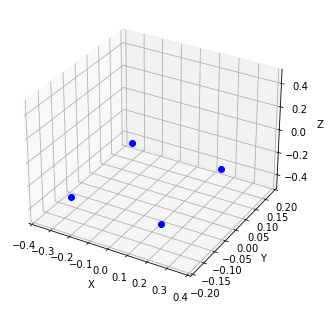

In [189]:
anim = visualize_animated_footsteps(motion_015_fwd, footsteps_015_fwd, "bo")
HTML(anim.to_html5_video())

### Backward motion

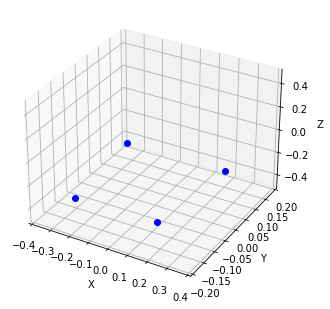

In [190]:
anim = visualize_animated_footsteps(motion_015_bwd, footsteps_015_bwd, "bo")
HTML(anim.to_html5_video())

### Side motion (right)

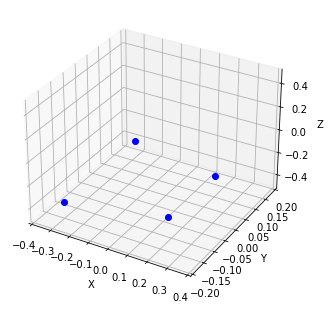

In [191]:
anim = visualize_animated_footsteps(motion_015_side_right, footsteps_015_side_right, "bo")
HTML(anim.to_html5_video())

### Side motion (left)

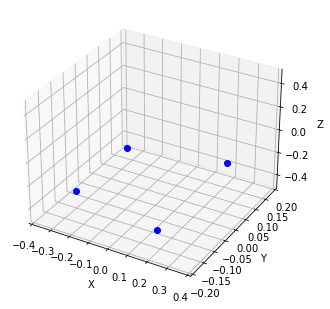

In [192]:
anim = visualize_animated_footsteps(motion_015_side_left, footsteps_015_side_left, "bo")
HTML(anim.to_html5_video())

### Rotation (clockwise)

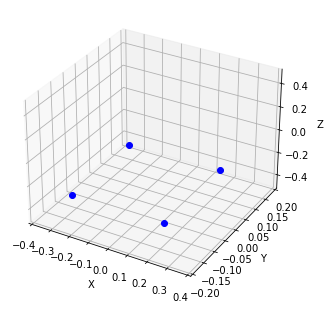

In [193]:
anim = visualize_animated_footsteps(motion_015_clock, footsteps_015_clock, "bo")
HTML(anim.to_html5_video())

### Rotation (counter clockwise)

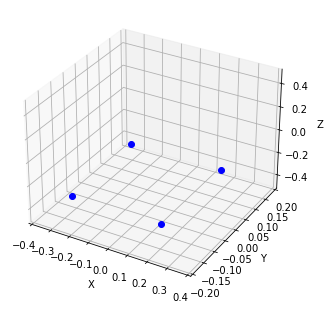

In [194]:
anim = visualize_animated_footsteps(motion_015_count, footsteps_015_count, "bo")
HTML(anim.to_html5_video())

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [195]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [196]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

In [197]:
def create_timestamp_consistent_dataset(dataset, footsteps):
    # Footsteps sizes
    inputs = []
    labels = []
        
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx > 0:
            time_diff = dataset[footsteps[idx], 0] - dataset[footsteps[idx-1], 0]
            
            if time_diff < 1.0:
                inputs.append(dataset[footsteps[idx-1], 1:7].tolist() + dataset[footsteps[idx-1], 7:19].tolist())
                labels.append(dataset[footsteps[idx], 7:19])
            else:
                continue
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_015_fwd_3D, Y_motion_015_fwd_3D = create_timestamp_consistent_dataset(motion_015_fwd, footsteps_015_fwd)
X_motion_015_bwd_3D, Y_motion_015_bwd_3D = create_timestamp_consistent_dataset(motion_015_bwd, footsteps_015_bwd)
X_motion_015_clock_3D, Y_motion_015_clock_3D = create_timestamp_consistent_dataset(motion_015_clock, footsteps_015_clock)
X_motion_015_count_3D, Y_motion_015_count_3D = create_timestamp_consistent_dataset(motion_015_count, footsteps_015_count)
X_motion_015_side_left_3D, Y_motion_015_side_left_3D = create_timestamp_consistent_dataset(motion_015_side_left, footsteps_015_side_left)
X_motion_015_side_right_3D, Y_motion_015_side_right_3D = create_timestamp_consistent_dataset(motion_015_side_right, footsteps_015_side_right)

# Stack datasets
X_motion_015_3D = np.concatenate((X_motion_015_fwd_3D, X_motion_015_bwd_3D, X_motion_015_side_right_3D, X_motion_015_side_left_3D, X_motion_015_clock_3D, X_motion_015_count_3D))
Y_motion_015_3D = np.concatenate((Y_motion_015_fwd_3D, Y_motion_015_bwd_3D, Y_motion_015_side_right_3D, Y_motion_015_side_left_3D, Y_motion_015_clock_3D, Y_motion_015_count_3D))

In [198]:
%store X_motion_015_3D
%store Y_motion_015_3D

Stored 'X_motion_015_3D' (ndarray)
Stored 'Y_motion_015_3D' (ndarray)


In [200]:
def create_timestamp_consistent_dataset_with_step_size_labels(dataset, footsteps, threshold=0.02):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 1.0:
                
                # Find closest timestamp with gap of 0.12 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 0.12))
                idx_height_check = absolute_val_array.argmin()
                
                fl_moving = np.abs(dataset[footstep, 9] - dataset[idx_height_check, 9]) > threshold
                fr_moving = np.abs(dataset[footstep, 12] - dataset[idx_height_check, 12]) > threshold
                rl_moving = np.abs(dataset[footstep, 15] - dataset[idx_height_check, 15]) > threshold
                rr_moving = np.abs(dataset[footstep, 18] - dataset[idx_height_check, 18]) > threshold

                valid_1 = (fr_moving > threshold) == (rl_moving > threshold)
                valid_2 = (rr_moving > threshold) == (fl_moving > threshold)
                valid_3 = (fr_moving > threshold) != (fl_moving > threshold)

                if (not valid_1 or not valid_2 or not valid_3):
                    print("Skipping idx: ", idx, " as flags not valid")
                    continue
                
                # Compute FL movement
                fl_movement_x = abs(abs(dataset[footstep, 7]) - abs(dataset[footsteps[idx+1], 7]))
                fl_movement_y = abs(abs(dataset[footstep, 8]) - abs(dataset[footsteps[idx+1], 8]))

                # Compute FR movement
                fr_movement_x = abs(abs(dataset[footstep, 10]) - abs(dataset[footsteps[idx+1], 10]))
                fr_movement_y = abs(abs(dataset[footstep, 11]) - abs(dataset[footsteps[idx+1], 11]))

                # Compute RL movement
                rl_movement_x = abs(abs(dataset[footstep, 13]) - abs(dataset[footsteps[idx+1], 13]))
                rl_movement_y = abs(abs(dataset[footstep, 14]) - abs(dataset[footsteps[idx+1], 14]))

                # Compute RR movement
                rr_movement_x = abs(abs(dataset[footstep, 16]) - abs(dataset[footsteps[idx+1], 16]))
                rr_movement_y = abs(abs(dataset[footstep, 17]) - abs(dataset[footsteps[idx+1], 17]))
                
                # Compute new feet position w.r.t old centre of mass
                fl_x = dataset[footstep, 7] + (fr_movement_x + fl_movement_x)
                fl_y = dataset[footstep, 8] + (fr_movement_y + fl_movement_y)
                fr_x = dataset[footstep, 10] + (fr_movement_x + fl_movement_x)
                fr_y = dataset[footstep, 11] + (fr_movement_y + fl_movement_y)
                rl_x = dataset[footstep, 13] + (rr_movement_x + rl_movement_x)
                rl_y = dataset[footstep, 14] + (rr_movement_y + rl_movement_y)
                rr_x = dataset[footstep, 16] + (rr_movement_x + rl_movement_x)
                rr_y = dataset[footstep, 17] + (rr_movement_y + rl_movement_y)

                label = []

                if fr_moving:
                    label.append([dataset[footstep, 7], dataset[footstep, 8], fr_x, fr_y, rl_x, rl_y, dataset[footstep, 16], dataset[footstep, 17]])
                elif fl_moving:
                    label.append([fl_x, fl_y, dataset[footstep, 10], dataset[footstep, 11], dataset[footstep, 13], dataset[footstep, 14], rr_x, rr_y])
                else:
                    print("\nERROR")

                labels.append(label)
                inputs.append(dataset[footsteps[idx-1], 1:7].tolist() + dataset[footsteps[idx-1], 7:19].tolist())
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy.reshape(labels_numpy.shape[0], labels_numpy.shape[2])

X_motion_015_fwd_step, Y_motion_015_fwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_015_fwd, footsteps_015_fwd)
X_motion_015_bwd_step, Y_motion_015_bwd_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_015_bwd, footsteps_015_bwd)
X_motion_015_clock_step, Y_motion_015_clock_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_015_clock, footsteps_015_clock)
X_motion_015_count_step, Y_motion_015_count_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_015_count, footsteps_015_count)
X_motion_015_side_left_step, Y_motion_015_side_left_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_015_side_left, footsteps_015_side_left)
X_motion_015_side_right_step, Y_motion_015_side_right_step = create_timestamp_consistent_dataset_with_step_size_labels(motion_015_side_right, footsteps_015_side_right)

# Stack datasets
X_motion_015_step = np.concatenate((X_motion_015_fwd_step, X_motion_015_bwd_step, X_motion_015_side_right_step, X_motion_015_side_left_step, X_motion_015_clock_step, X_motion_015_count_step))
Y_motion_015_step = np.concatenate((Y_motion_015_fwd_step, Y_motion_015_bwd_step, Y_motion_015_side_right_step, Y_motion_015_side_left_step, Y_motion_015_clock_step, Y_motion_015_count_step))

In [201]:
%store X_motion_015_step
%store Y_motion_015_step

Stored 'X_motion_015_step' (ndarray)
Stored 'Y_motion_015_step' (ndarray)


In [202]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} motion\n')
    
    # Find all positive movements in x and y for FR
    fr_steps_x = np.where(dataset[:, 0] > 0)[0]
    fr_steps_y = np.where(dataset[:, 1] > 0)[0]
    
    # Find all positive movements in x and y for FR
    fl_steps_x = np.where(dataset[:, 2] > 0)[0]
    fl_steps_y = np.where(dataset[:, 3] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rr_steps_x = np.where(dataset[:, 4] > 0)[0]
    rr_steps_y = np.where(dataset[:, 5] > 0)[0]
    
    # Find all positive movements in x and y for FR
    rl_steps_x = np.where(dataset[:, 6] > 0)[0]
    rl_steps_y = np.where(dataset[:, 7] > 0)[0]
    
    # Compute stats for FR foot
    print(f'FR mean x step: {np.mean(dataset[fr_steps_x, 0])}. FR std x step: {np.std(dataset[fr_steps_x, 0])}. FR mean y step: {np.mean(dataset[fr_steps_y, 1])}. FR std y step: {np.std(dataset[fr_steps_y, 1])}')
 
    # Compute stats for FL foot
    print(f'FL mean x step: {np.mean(dataset[fl_steps_x, 2])}. FL std x step: {np.std(dataset[fl_steps_x, 2])}. FL mean y step: {np.mean(dataset[fl_steps_y, 3])}. FL std y step: {np.std(dataset[fl_steps_y, 3])}')
    
    # Compute stats for RR foot
    print(f'RR mean x step: {np.mean(dataset[rr_steps_x, 4])}. RR std x step: {np.std(dataset[rr_steps_x, 4])}. RR mean y step: {np.mean(dataset[rr_steps_y, 5])}. RR std y step: {np.std(dataset[rr_steps_y, 5])}')
    
    # Compute stats for RL foot
    print(f'RL mean x step: {np.mean(dataset[rl_steps_x, 6])}. RL std x step: {np.std(dataset[rl_steps_x, 6])}. RL mean y step: {np.mean(dataset[rl_steps_y, 7])}. RL std y step: {np.std(dataset[rl_steps_y, 7])}\n')
    
labels_stats(Y_motion_015_fwd_step, "forward")
labels_stats(Y_motion_015_bwd_step, "backward")
labels_stats(Y_motion_015_clock_step, "clockwise")
labels_stats(Y_motion_015_count_step, "counter clockwise")
labels_stats(Y_motion_015_side_left_step, "left step")
labels_stats(Y_motion_015_side_right_step, "right step")

Statistics for forward motion

FR mean x step: 0.22972375690607733. FR std x step: 0.021184559665145247. FR mean y step: 0.1385469613259669. FR std y step: 0.006989673056766915
FL mean x step: 0.23338674033149168. FL std x step: 0.02370571511584426. FL mean y step: nan. FL std y step: nan
RR mean x step: nan. RR std x step: nan. RR mean y step: 0.13894475138121548. RR std y step: 0.0009789144788862978
RL mean x step: nan. RL std x step: nan. RL mean y step: nan. RL std y step: nan

Statistics for backward motion

FR mean x step: 0.24544999999999997. FR std x step: 0.0819020604136428. FR mean y step: 0.1390388888888889. FR std y step: 0.007004255760995034
FL mean x step: 0.24304444444444442. FL std x step: 0.079019675624508. FL mean y step: nan. FL std y step: nan
RR mean x step: nan. RR std x step: nan. RR mean y step: 0.13788333333333336. RR std y step: 0.0016440971855567294
RL mean x step: nan. RL std x step: nan. RL mean y step: nan. RL std y step: nan

Statistics for clockwise moti

/home/itaouil/miniconda3/envs/pytorch-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/itaouil/miniconda3/envs/pytorch-env/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/itaouil/miniconda3/envs/pytorch-env/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/itaouil/miniconda3/envs/pytorch-env/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/itaouil/miniconda3/envs/pytorch-env/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [206]:
def getCoMDataset(dataset, footsteps, threshold=0.02):
    # Footsteps sizes
    inputs = []
    labels = []
            
    # Compute step sizes
    for idx, footstep in enumerate(footsteps):
        if idx < (len(footsteps) - 1):
            time_diff = abs(dataset[footsteps[idx], 0] - dataset[footsteps[idx+1], 0])
            
            if time_diff < 1.0:
                
                # Find closest timestamp with gap of 0.12 (to know which foot is moving)
                absolute_val_array = np.abs(dataset[:, 0] - (dataset[footstep, 0] + 0.12))
                idx_height_check = absolute_val_array.argmin()
                
                fl_moving = np.abs(dataset[footstep, 9] - dataset[idx_height_check, 9]) > threshold
                fr_moving = np.abs(dataset[footstep, 12] - dataset[idx_height_check, 12]) > threshold
                rl_moving = np.abs(dataset[footstep, 15] - dataset[idx_height_check, 15]) > threshold
                rr_moving = np.abs(dataset[footstep, 18] - dataset[idx_height_check, 18]) > threshold

                valid_1 = (fr_moving > threshold) == (rl_moving > threshold)
                valid_2 = (rr_moving > threshold) == (fl_moving > threshold)
                valid_3 = (fr_moving > threshold) != (fl_moving > threshold)

                if (not valid_1 or not valid_2 or not valid_3):
                    print("Skipping idx: ", idx, " as flags not valid")
                    continue
                    
                # CoM absolute movement
                com_movement_x = None
                com_movement_y = None
                com_movement_theta = None
                
                # Compute CoM absolute movement
                if fr_moving:
                    com_movement_x = abs(abs(dataset[footstep, 7]) - abs(dataset[footsteps[idx+1], 7]))
                    com_movement_y = abs(abs(dataset[footstep, 8]) - abs(dataset[footsteps[idx+1], 8]))
                    com_movement_theta = np.arctan2(com_movement_x, com_movement_y) * 180 / np.pi
                elif fl_moving:
                    com_movement_x = abs(abs(dataset[footstep, 10]) - abs(dataset[footsteps[idx+1], 10]))
                    com_movement_y = abs(abs(dataset[footstep, 11]) - abs(dataset[footsteps[idx+1], 11]))
                    com_movement_theta = np.arctan2(com_movement_x, com_movement_y) * 180 / np.pi
                else:
                    print("\nERROR")

                labels.append([com_movement_x, com_movement_y, com_movement_theta])
                inputs.append(dataset[footsteps[idx-1], 1:7].tolist() + dataset[footsteps[idx-1], 7:19].tolist())
                    
    # Convert to numpy array
    inputs_numpy = np.array(inputs)
    labels_numpy = np.array(labels)
    
    return inputs_numpy, labels_numpy

X_motion_015_fwd_CoM_step, Y_motion_015_fwd_CoM_step = getCoMDataset(motion_015_fwd, footsteps_015_fwd)
X_motion_015_bwd_CoM_step, Y_motion_015_bwd_CoM_step = getCoMDataset(motion_015_bwd, footsteps_015_bwd)
X_motion_015_clock_CoM_step, Y_motion_015_clock_CoM_step = getCoMDataset(motion_015_clock, footsteps_015_clock)
X_motion_015_count_CoM_step, Y_motion_015_count_CoM_step = getCoMDataset(motion_015_count, footsteps_015_count)
X_motion_015_side_left_CoM_step, Y_motion_015_side_left_CoM_step = getCoMDataset(motion_015_side_left, footsteps_015_side_left)
X_motion_015_side_right_CoM_step, Y_motion_015_side_right_CoM_step = getCoMDataset(motion_015_side_right, footsteps_015_side_right)

# Stack datasets
X_motion_015_CoM_step = np.concatenate((X_motion_015_fwd_CoM_step, X_motion_015_bwd_CoM_step, X_motion_015_side_right_CoM_step, X_motion_015_side_left_CoM_step, X_motion_015_clock_CoM_step, X_motion_015_count_CoM_step))
Y_motion_015_CoM_step = np.concatenate((Y_motion_015_fwd_CoM_step, Y_motion_015_bwd_CoM_step, Y_motion_015_side_right_CoM_step, Y_motion_015_side_left_CoM_step, Y_motion_015_clock_CoM_step, Y_motion_015_count_CoM_step))

In [207]:
%store X_motion_015_CoM_step
%store Y_motion_015_CoM_step

Stored 'X_motion_015_CoM_step' (ndarray)
Stored 'Y_motion_015_CoM_step' (ndarray)


In [221]:
def labels_stats(dataset, title):
    print(f'Statistics for {title} CoM motion')
    
    # Compute stats for FR foot
    print(f'CoM mean x step: {round(np.mean(dataset[:, 0]), 3)}. CoM mean y step: {round(np.mean(dataset[:, 1]), 3)}. CoM std x step: {round(np.std(dataset[:, 0]), 3)}. CoM std y step: {round(np.std(dataset[:, 1]), 3)}.\n')

labels_stats(Y_motion_015_fwd_CoM_step, "forward")
labels_stats(Y_motion_015_bwd_CoM_step, "backward")
labels_stats(Y_motion_015_clock_CoM_step, "clockwise")
labels_stats(Y_motion_015_count_CoM_step, "counter clockwise")
labels_stats(Y_motion_015_side_left_CoM_step, "left step")
labels_stats(Y_motion_015_side_right_CoM_step, "right step")

Statistics for forward CoM motion
CoM mean x step: 0.044. CoM mean y step: 0.004. CoM std x step: 0.006. CoM std y step: 0.002.

Statistics for backward CoM motion
CoM mean x step: 0.053. CoM mean y step: 0.004. CoM std x step: 0.006. CoM std y step: 0.001.

Statistics for clockwise CoM motion
CoM mean x step: 0.007. CoM mean y step: 0.009. CoM std x step: 0.005. CoM std y step: 0.003.

Statistics for counter clockwise CoM motion
CoM mean x step: 0.006. CoM mean y step: 0.01. CoM std x step: 0.004. CoM std y step: 0.004.

Statistics for left step CoM motion
CoM mean x step: 0.006. CoM mean y step: 0.053. CoM std x step: 0.004. CoM std y step: 0.01.

Statistics for right step CoM motion
CoM mean x step: 0.005. CoM mean y step: 0.052. CoM std x step: 0.002. CoM std y step: 0.006.



In [224]:
print(f'Rotation in rad for clockwise {np.arctan(np.mean(Y_motion_015_clock_CoM_step[:, 1]) / -np.mean(Y_motion_015_clock_CoM_step[:, 0]))}')
print(f'Rotation in angles for clockwise {np.arctan(np.mean(Y_motion_015_clock_CoM_step[:, 1]) / -np.mean(Y_motion_015_clock_CoM_step[:, 0])) * 180 / np.pi}')

Rotation in rad for clockwise -0.8948453723054953
Rotation in angles for clockwise -51.27086314991772


In [225]:
print(f'Rotation in rad for count {np.arctan(np.mean(Y_motion_015_clock_CoM_step[:, 1]) / np.mean(Y_motion_015_clock_CoM_step[:, 0]))}')
print(f'Rotation in angles for count {np.arctan(np.mean(Y_motion_015_clock_CoM_step[:, 1]) / np.mean(Y_motion_015_clock_CoM_step[:, 0])) * 180 / np.pi}')

Rotation in rad for count 0.8948453723054953
Rotation in angles for count 51.27086314991772
